In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/FYP2/Test_Models/VGG2

/content/drive/MyDrive/FYP2/Test_Models/VGG2


In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf

In [4]:
# Load custom Function
import image_padding
import create_model

# Load Model

In [5]:
input_shape = (None, None, 3)
model = create_model.build_model(input_shape)
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "VGG_Model_LowLight_Enhancement"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
    

In [6]:
def charbonnier_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred) + tf.square(1e-3)))

def psnr_loss_fn(y_true, y_pred):
    return tf.image.psnr(y_pred, y_true, max_val=255.0)

def ssim_loss_fn(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)

In [7]:
model_path = r'/content/drive/MyDrive/FYP2/Test_Models/VGG2/VGGv4.h5'

In [8]:
from keras.models import load_model
model = load_model(model_path,custom_objects={'charbonnier_loss': charbonnier_loss,
                                              'psnr_loss_fn':psnr_loss_fn,
                                              'ssim_loss_fn':ssim_loss_fn},
                                              compile = False)

In [24]:
def preprocess_npImage(np_image):
  img_dim = np_image.shape[:2]
  np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
  preprocess_img = image_padding.pad_image(np_image)
  preprocess_img = preprocess_img/255;
  return preprocess_img,img_dim

def preprocess_image(img_path):
  img = cv2.imread(img_path)
  return preprocess_npImage(img)

## **Prediction for all images in folder**

In [10]:
# train
#test_image_dir = r'/content/drive/MyDrive/FYP/YOLO_Results/Train'
# test_image_dir = r'/content/drive/MyDrive/FYP2/Test_Models/VGG_LowLight_v1/testing_images_v3'
#test_image_dir = r'/content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOLdataset_All/eval15/low'
test_image_dir = r'/content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images'

In [22]:
# saving
save_dir = r'/content/drive/MyDrive/FYP2/Test_Models/VGG_LowLight_v1'
save_folder_name = 'LLE_UNET_v6'
save_folder_path = os.path.join(save_dir,save_folder_name)

if not os.path.exists(save_folder_path):
  print("DIRECTORY CREATED")
  os.makedirs(save_folder_path)

0 Already Saved
1/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/665.png


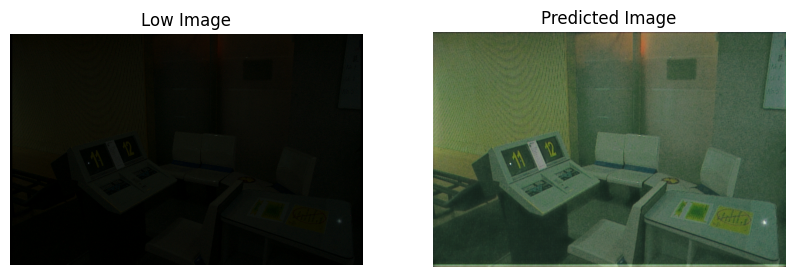

1 Already Saved
2/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/23.png


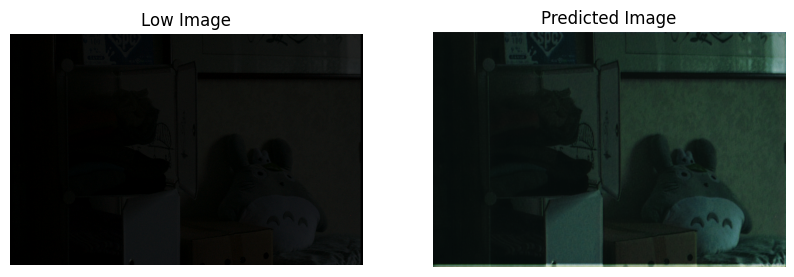

2 Already Saved
3/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/111.png


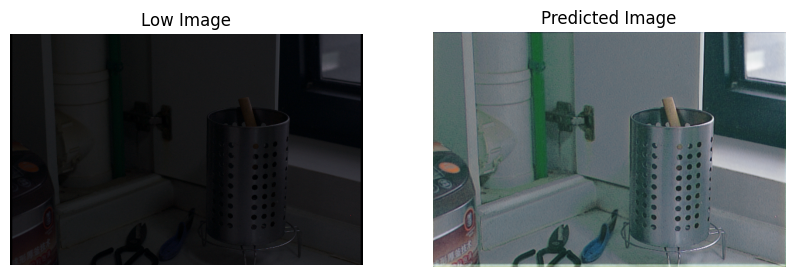

3 Already Saved
4/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/669.png


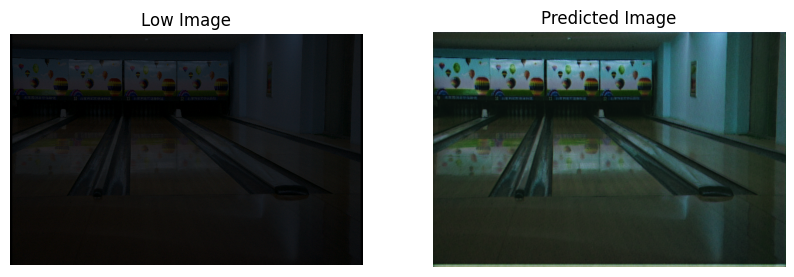

4 Already Saved
5/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/179.png


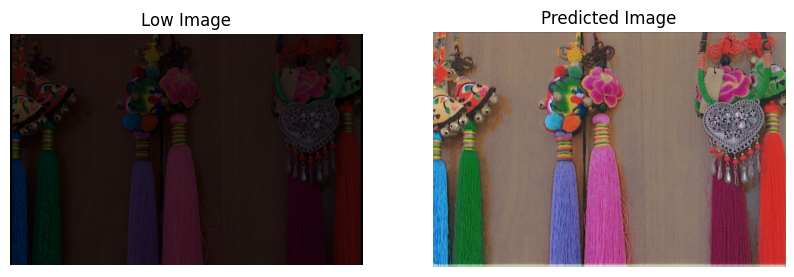

5 Already Saved
6/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/146.png


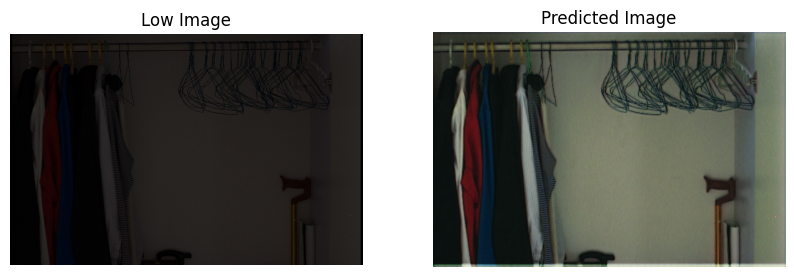

6 Already Saved
7/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/493.png


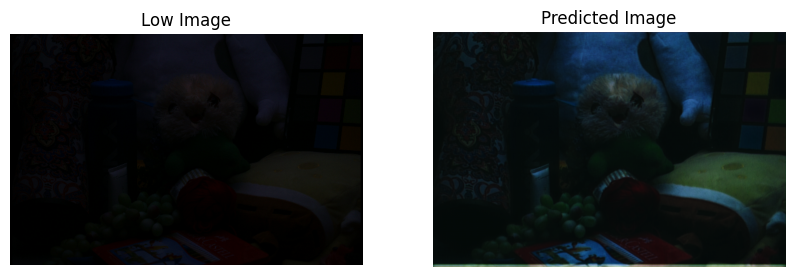

7 Already Saved
8/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/780.png


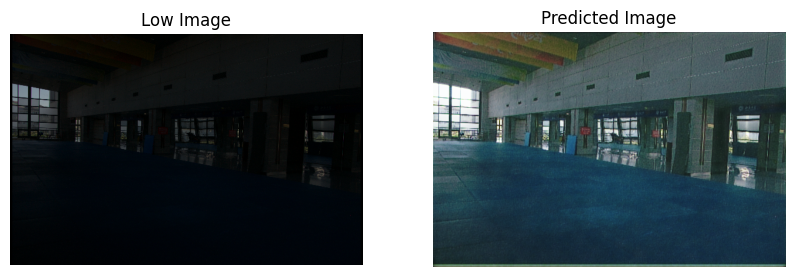

8 Already Saved
9/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/55.png


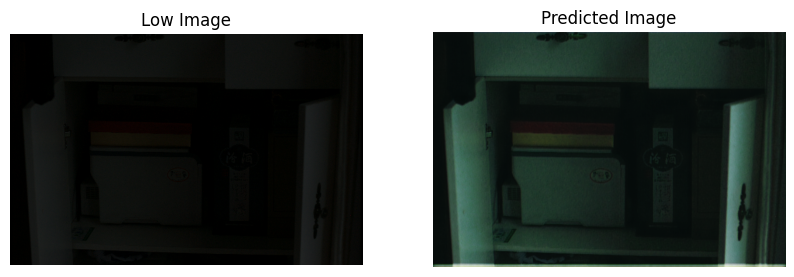

9 Already Saved
10/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/1.png


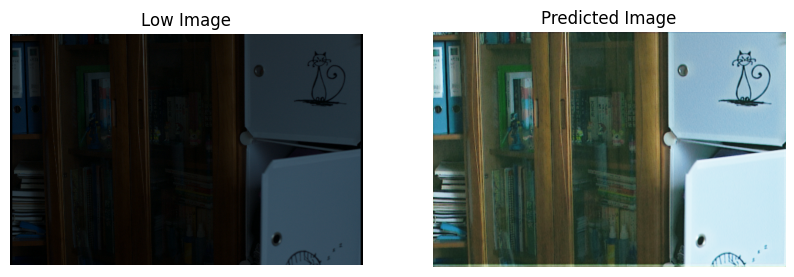

10 Already Saved
11/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/547.png


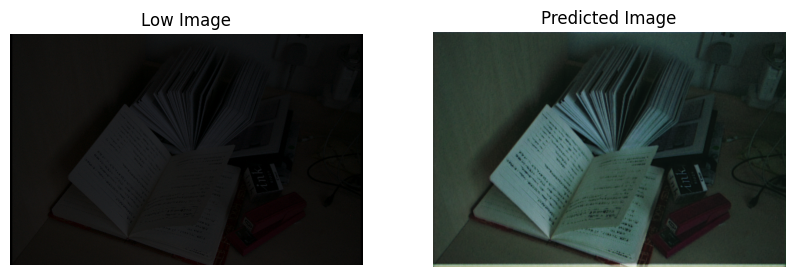

11 Already Saved
12/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/748.png


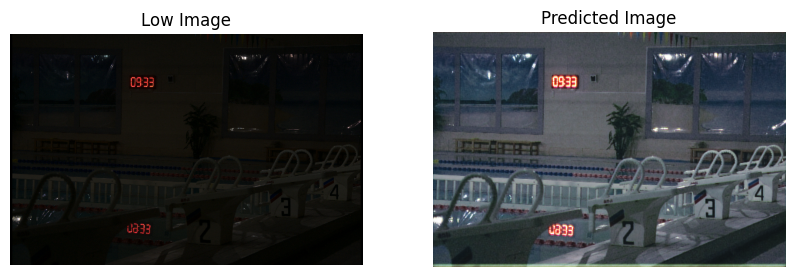

12 Already Saved
13/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/22.png


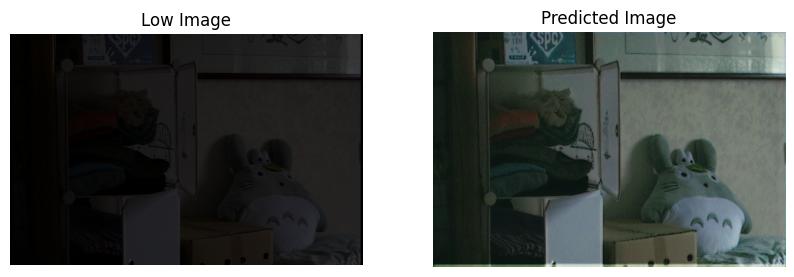

13 Already Saved
14/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/79.png


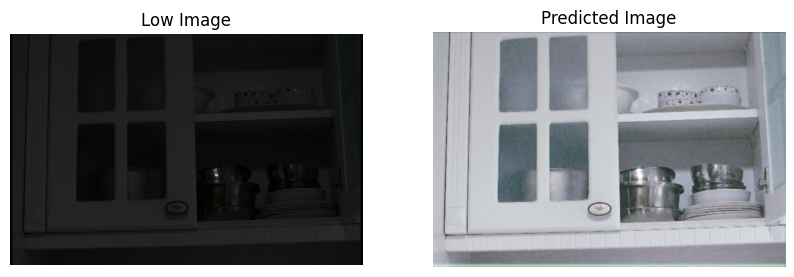

14 Already Saved
15/15 : /content/drive/MyDrive/FYP/Datastets/Lol_Dataset/LOL_testImages/LOL_Low_Images/778.png


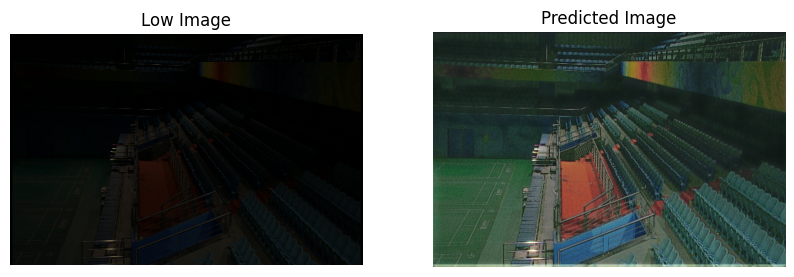

In [23]:
saved_images = os.listdir(save_folder_path)
test_images = os.listdir(test_image_dir)

#n_images = 20
n_images = len(test_images)
display = True

for i,image_name in enumerate(test_images):
  if i==n_images:
    break

  if image_name in saved_images:
    print(f"{i} Already Saved")
    #continue
  image_path = os.path.join(test_image_dir,image_name)
  print(f'{i+1}/{n_images} : {image_path}')

  img = cv2.imread(image_path)
  w,h = img.shape[0],img.shape[1]

  low_img,img_dim = preprocess_image(image_path)
  prediction = model.predict(np.expand_dims(low_img,axis=0),verbose=0)

  out_frame = prediction[0]*255.0
  out_frame = out_frame.astype(np.uint8)
  out_frame = image_padding.inverse_padding(out_frame, img_dim, pad_method="center_padding")
  # out_frame = cv2.resize(out_frame,(h,w))

  if display:
    fig, ax = plt.subplots(ncols=2, figsize=(10,10));
    ax[0].imshow(low_img);
    ax[1].imshow(out_frame);

    ax[0].axis('off');
    ax[1].axis('off');

    ax[0].set_title("Low Image")
    ax[1].set_title("Predicted Image")
    plt.show()

  ### save
  #save_name = f'VGG_{image_name.split(".")[0]}.png'
  save_name = image_name
  save_path = os.path.join(save_folder_path,save_name)
  #fig.savefig(save_path,bbox_inches='tight',dpi=300);

  cv2.imwrite(save_path, out_frame)

## **Prediction for Image**

In [11]:
test_lowimg_path = r'/content/drive/MyDrive/FYP2/Test_Models/VGG_LowLight_v1/Copy-of-IMG_7957-1-mov_Frame_720_jpg.rf.4f988c600fbf4d641dcf281e3341071f.jpg'

In [25]:
LowImg,img_dim = preprocess_image(test_lowimg_path)
print(img_dim)

(1080, 1920)


In [26]:
prediction = model.predict(np.expand_dims(LowImg,axis=0))[0]
prediction_image = image_padding.inverse_padding(prediction, img_dim, pad_method="center_padding")

1/1 [==============================] - 0s 46ms/step


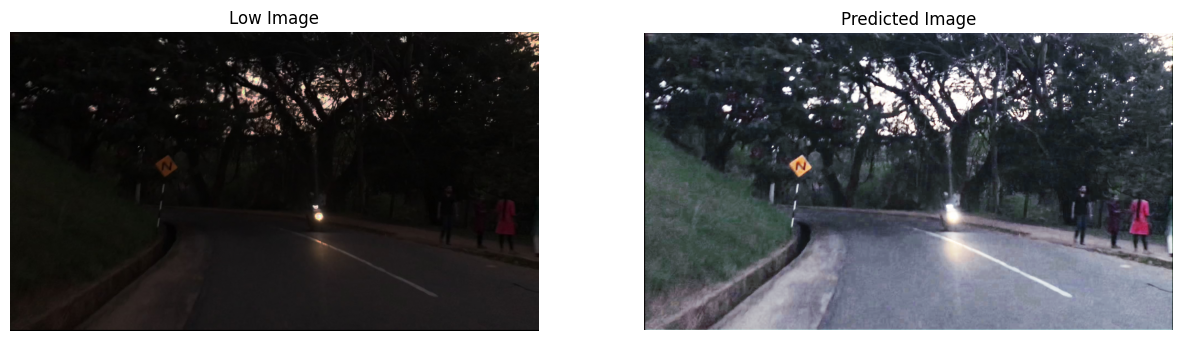

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(15,10));
ax[0].imshow(LowImg);
ax[1].imshow(prediction_image);

ax[0].axis('off');
ax[1].axis('off');

ax[0].set_title("Low Image")
ax[1].set_title("Predicted Image")
plt.show()

## **Video Prediction**

In [28]:
video_path = r'/content/drive/MyDrive/FYP/Datastets/Data_Primash/February /IMG_7948.mov'

Total Frames : 6651.0
FPS : 30.000676605245946


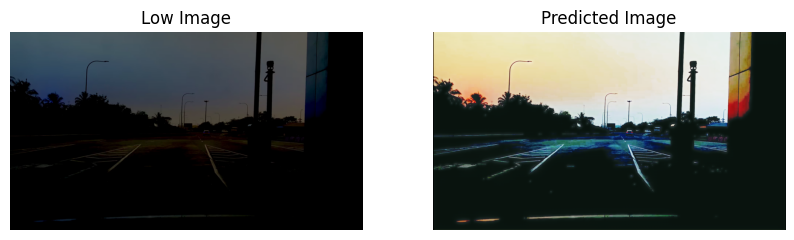

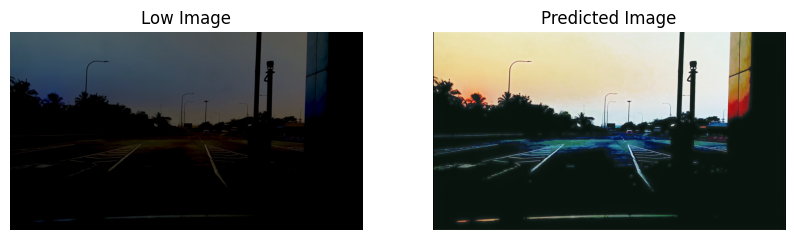

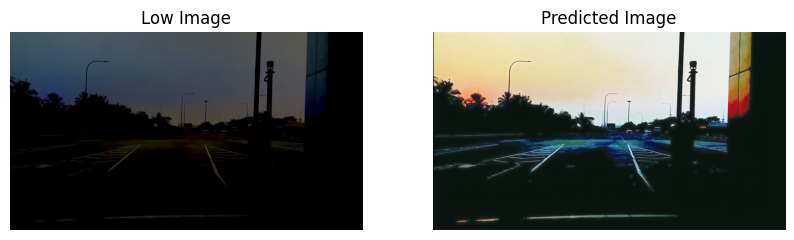

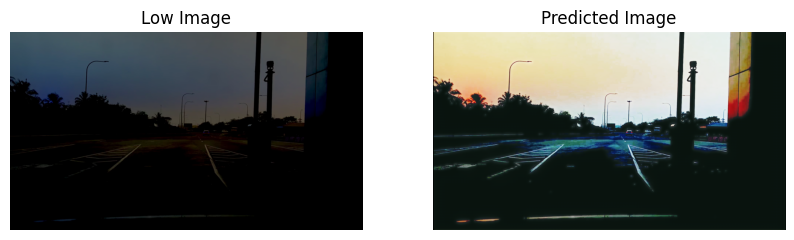

In [31]:
cap = cv2.VideoCapture(video_path)

total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'Total Frames : {total_frames}')
print(f'FPS : {fps}')

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret: break

    w,h = frame.shape[0],frame.shape[1]
    frame_count += 1
    if frame_count==5:
      break

    img_preprocess,img_dim = preprocess_npImage(frame)

    prediction = model.predict(np.expand_dims(img_preprocess,axis=0),verbose=0)

    out_frame = prediction[0]*255.0
    out_frame = out_frame.astype(np.uint8)
    out_frame = image_padding.inverse_padding(out_frame, img_dim, pad_method="center_padding")


    fig, ax = plt.subplots(ncols=2, figsize=(10,10));
    ax[0].imshow(frame);
    ax[1].imshow(out_frame);
    ax[0].axis('off');
    ax[1].axis('off');
    ax[0].set_title("Low Image")
    ax[1].set_title("Predicted Image")
    plt.show()

cap.release()
cv2.destroyAllWindows()